### Time Series on Company Stock and Investment - Other shares investments


In [1]:
import pandas as pd
df=pd.read_csv("Company Stock and Investment.csv")

In [2]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
df.shape

(1984, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
Date                       1984 non-null object
Oil Investments            1984 non-null float64
Gold Investments           1984 non-null float64
Comp Stock                 1984 non-null float64
Other sharesInvestments    1984 non-null float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [7]:
import matplotlib.pyplot as plt

In [8]:
df.isnull().sum()
# There are no null data

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


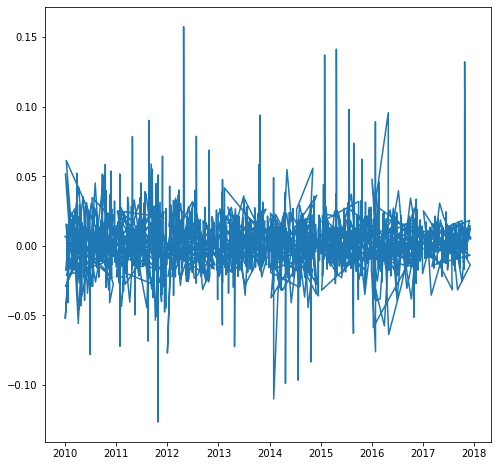

In [9]:
plt.figure(figsize=(8,8))
plt.plot(df['Date'], df['Other sharesInvestments'])


From plots we are not able to understand the trend of the data clearly as it is date wise. We will have to group it yearly wise to understand trend

##### Creating different dataframes for different investments

#### Other investments

In [10]:
df_other=df[['Date','Other sharesInvestments']].reset_index(drop=True)
df_other

,Date,Other sharesInvestments
0,2009-12-31,0.006848
1,2010-04-01,-0.004609
2,2010-05-01,0.005900
3,2010-06-01,-0.018116
4,2010-07-01,-0.017013
...,...,...
1979,2017-09-11,-0.003310
1980,2017-10-11,-0.003348
1981,2017-11-13,0.003395
1982,2017-11-14,0.006793


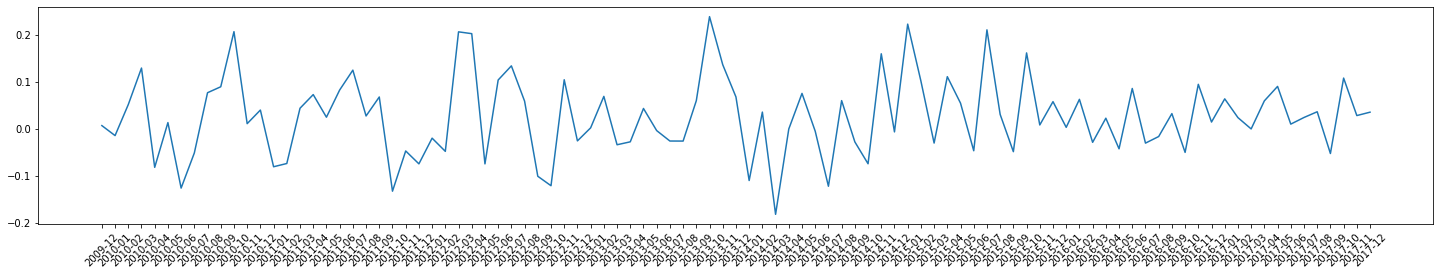

In [11]:
other_yrgroup=df_other.groupby(df_other['Date'].dt.strftime('%Y-%m'))['Other sharesInvestments'].sum()
plt.figure(figsize=(25,4))
plt.plot(other_yrgroup)
plt.tick_params(axis='x',rotation=45)

##### Observations
1. The other investments stock and investments has fluctuations 

##### Checking the stationarity of the data
We need to check the stationarity of the data by visual method of rolling mean and rolling standard deviation and by Dickey Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.DataFrame.rolling(timeseries, window=12).mean()
    rolstd = pd.DataFrame.rolling(timeseries, window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [13]:
## testing for stationarity in Comp stock data 

In [14]:
other_yrgroup=pd.DataFrame(other_yrgroup)
#.reset_index(inplace=True)
other_yrgroup.reset_index(inplace=True)
other_yrgroup

,Date,Other sharesInvestments
0,2009-12,0.006848
1,2010-01,-0.014408
2,2010-02,0.051631
3,2010-03,0.129358
4,2010-04,-0.082007
...,...,...
92,2017-08,0.036322
93,2017-09,-0.052548
94,2017-10,0.108013
95,2017-11,0.028225


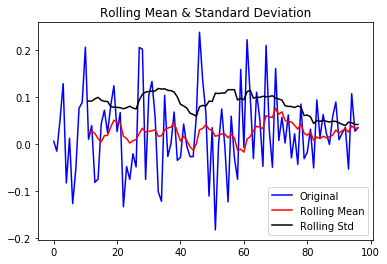

Results of Dickey-Fuller Test:
Test Statistic                -9.419783e+00
p-value                        5.543064e-16
#Lags Used                     0.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


In [15]:
test_stationarity(other_yrgroup['Other sharesInvestments'])


#### Observations from the graph and test data
1. The rolling mean and rolling standard deviation shows that the data was not uniform.
2. Since p value is less than 0.5, we can are rejecting the null hypothesis and concluding that the data is stationary

In [77]:
#!pip install statsmodels

##### Finding out the p,q,d value using acf and pacf graphs

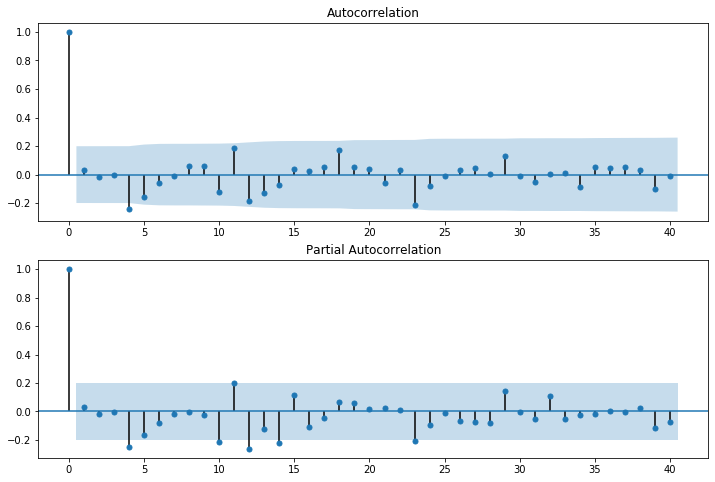

In [17]:

import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(other_yrgroup['Other sharesInvestments'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(other_yrgroup['Other sharesInvestments'],lags=40,ax=ax2)

#### Determining the values from above graph
1. p value is 1 derived by observing Partial Autocorrelation. The value has dropped suddenly, shut down, from top at x axis at 1.
2. q value is 1 derived by observing Autocorrelation. The value has not dropped gradually, but suddenly at 1 on x axis.
3. d value is 0 as we have not done any removing of seasonality

#### Fitting the SARIMAX model

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm # for sarimax

In [19]:
model=sm.tsa.statespace.SARIMAX(other_yrgroup['Other sharesInvestments'],order=(1,0,1),seasonal_order=(1,0,1,12)) # this order is p, d and q
model_fit=model.fit()

D:\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Other sharesInvestments   No. Observations:                   97
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 102.975
Date:                            Thu, 22 Oct 2020   AIC                           -195.950
Time:                                    17:03:56   BIC                           -183.077
Sample:                                         0   HQIC                          -190.745
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.011     90.027      0.000       0.978       1.021
ma.L1         -0.9818      0.198     -4.947      0.000      -1.371      -0.593
ar.S.L12       0.6467      0.388      1.669      0.095      -0.113       1.406
ma.S.L12      -0.8508      0.425     -2.004      0.045      -1.683      -0.019
sigma2         0.0067      0.002      3.589      0.000       0.003       0.010
===================================================================================
Ljung-Box (Q):                       35.82   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.66   Prob(JB):                         0.49
Heteroskedasticity (H):               0.46   Skew:                             0.29
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
other_yrgroup.shape

(97, 2)

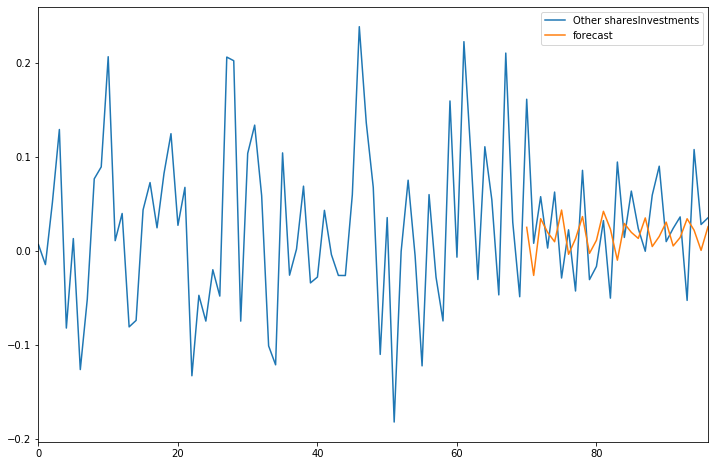

In [23]:
other_yrgroup['forecast']=model_fit.predict(start=70,end=97,dynamic=True)
other_yrgroup[['Other sharesInvestments','forecast']].plot(figsize=(12,8))

In [24]:
# creating some data to predict future of this
from pandas.tseries.offsets import DateOffset



In [25]:
other_yrgroup['Date']=pd.to_datetime(other_yrgroup['Date'])
future_dates=[other_yrgroup.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
future_dates_df=pd.DataFrame(index=future_dates[1:])#,columns=gold_group.columns)
future_dates_df.reset_index(inplace=True)
future_dates_df.rename(columns={'index':'Date'},inplace=True)
future_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


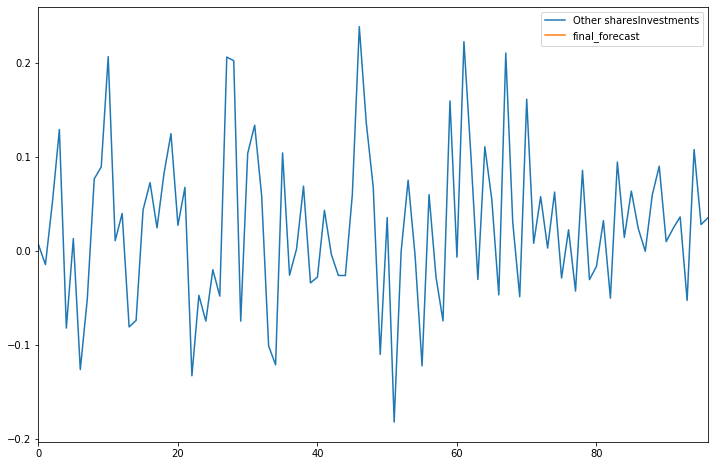

In [26]:
from datetime import datetime
future_dates_df['Date']=future_dates_df['Date'].dt.strftime('%m-%Y')
future_df=pd.concat([other_yrgroup,future_dates_df])
future_df['final_forecast']=model_fit.predict(start=98,end=133)
future_df[['Other sharesInvestments','final_forecast']].plot(figsize=(12,8))